In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

image_param = 128
batch_size = 32
no_of_epochs = 10

training_set = tf.keras.utils.image_dataset_from_directory(
    'archive_new/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(image_param, image_param),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


validation_set = tf.keras.utils.image_dataset_from_directory(
    'archive_new/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(image_param, image_param),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 70029 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [2]:
print(training_set)

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_param, image_param, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_param, image_param, 3), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(image_param, image_param, 3), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(image_param, image_param, 3), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

In [4]:
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(38, activation='softmax'))

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [6]:
training_data = model.fit(x = training_set, validation_data=validation_set, epochs=no_of_epochs)

Epoch 1/10
2189/2189 [==============================] - 167s 73ms/step - loss: 1.3713 - accuracy: 0.6038 - val_loss: 0.4886 - val_accuracy: 0.8548
Epoch 2/10
2189/2189 [==============================] - 168s 77ms/step - loss: 0.4975 - accuracy: 0.8451 - val_loss: 0.2972 - val_accuracy: 0.9037
Epoch 3/10
2189/2189 [==============================] - 172s 78ms/step - loss: 0.3046 - accuracy: 0.9036 - val_loss: 0.1956 - val_accuracy: 0.9365
Epoch 4/10
2189/2189 [==============================] - 174s 79ms/step - loss: 0.2240 - accuracy: 0.9268 - val_loss: 0.1891 - val_accuracy: 0.9385
Epoch 5/10
2189/2189 [==============================] - 174s 80ms/step - loss: 0.1687 - accuracy: 0.9443 - val_loss: 0.1692 - val_accuracy: 0.9462
Epoch 6/10
2189/2189 [==============================] - 175s 80ms/step - loss: 0.1339 - accuracy: 0.9554 - val_loss: 0.1115 - val_accuracy: 0.9626
Epoch 7/10
2189/2189 [==============================] - 175s 80ms/step - loss: 0.1114 - accuracy: 0.9634 - val_loss: 0

In [7]:
train_loss, train_accuracy = model.evaluate(training_set)
print(train_loss,train_accuracy)

2189/2189 [==============================] - 49s 22ms/step - loss: 0.0336 - accuracy: 0.9896
0.03355224058032036 0.9896471500396729


In [8]:
val_loss, val_accuracy = model.evaluate(validation_set)
print(val_loss,val_accuracy)

550/550 [==============================] - 12s 22ms/step - loss: 0.1068 - accuracy: 0.9642
0.10675353556871414 0.9642044305801392


In [9]:
model.save('model_1.keras')

In [10]:
import json

with open ("training_history.json", "w") as File:
    json.dump(training_data.history, File)


In [11]:
x_axis = [i for i in range(1,no_of_epochs+1)]
print(x_axis)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


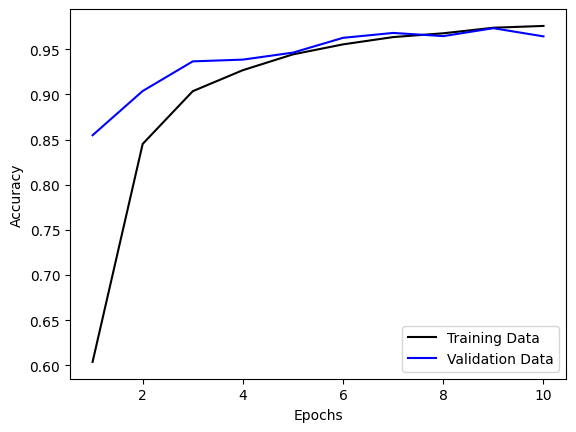

In [12]:
plt.plot(x_axis, training_data.history["accuracy"], color='black',label="Training Data")
plt.plot(x_axis, training_data.history["val_accuracy"], color='blue',label="Validation Data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [13]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'archive_new/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(image_param, image_param),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 266 files belonging to 38 classes.


In [14]:
prediction = model.predict(test_set)


9/9 [==============================] - 1s 74ms/step


In [15]:
predicted_vals = tf.argmax(prediction, axis=1)
true_vals = tf.concat([y for x,y in test_set], axis=0)
true_vals = tf.argmax(true_vals, axis=1)

print(predicted_vals, true_vals)

tf.Tensor(
[ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2 37  3  3  3
 28  3  3  3  4  4  2  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  7  7  7  7  7  8  8  8  8  8  8  8  9  9  9  9  9  9  9 10 10
 10 10 10 10 10 11 11 11 12 11 11 11 12 12 12 12 12 12 12 13 13 13 13 13
 13 13 14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 20
 20 20 20 21 21 21 29 21 21 21 22 22 22 22 22 22 22 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 25 25 25 25 25 25 25 26 26 26 26 26 26 26 27 27 27
 27 22 27 27 28 28 35 28 28 28 28 29 29 29 29 29 29 29 30 30 30 30 30 30
 30 31 31 31 31 31 31 31 32 29 32 32 32 32 32 33 33 33 33 33 33 33 34 34
 34 34 34 34 34 35 35 35 35 35 35 35 36 36 36 36 36 36 36 37 37 37 37 37
 37 37], shape=(266,), dtype=int64) tf.Tensor(
[ 0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3
  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6

In [16]:
classes = test_set.class_names
report = classification_report(true_vals, predicted_vals, target_names=classes)

with open ("Report.txt", "w") as Report:
    Report.write(report)

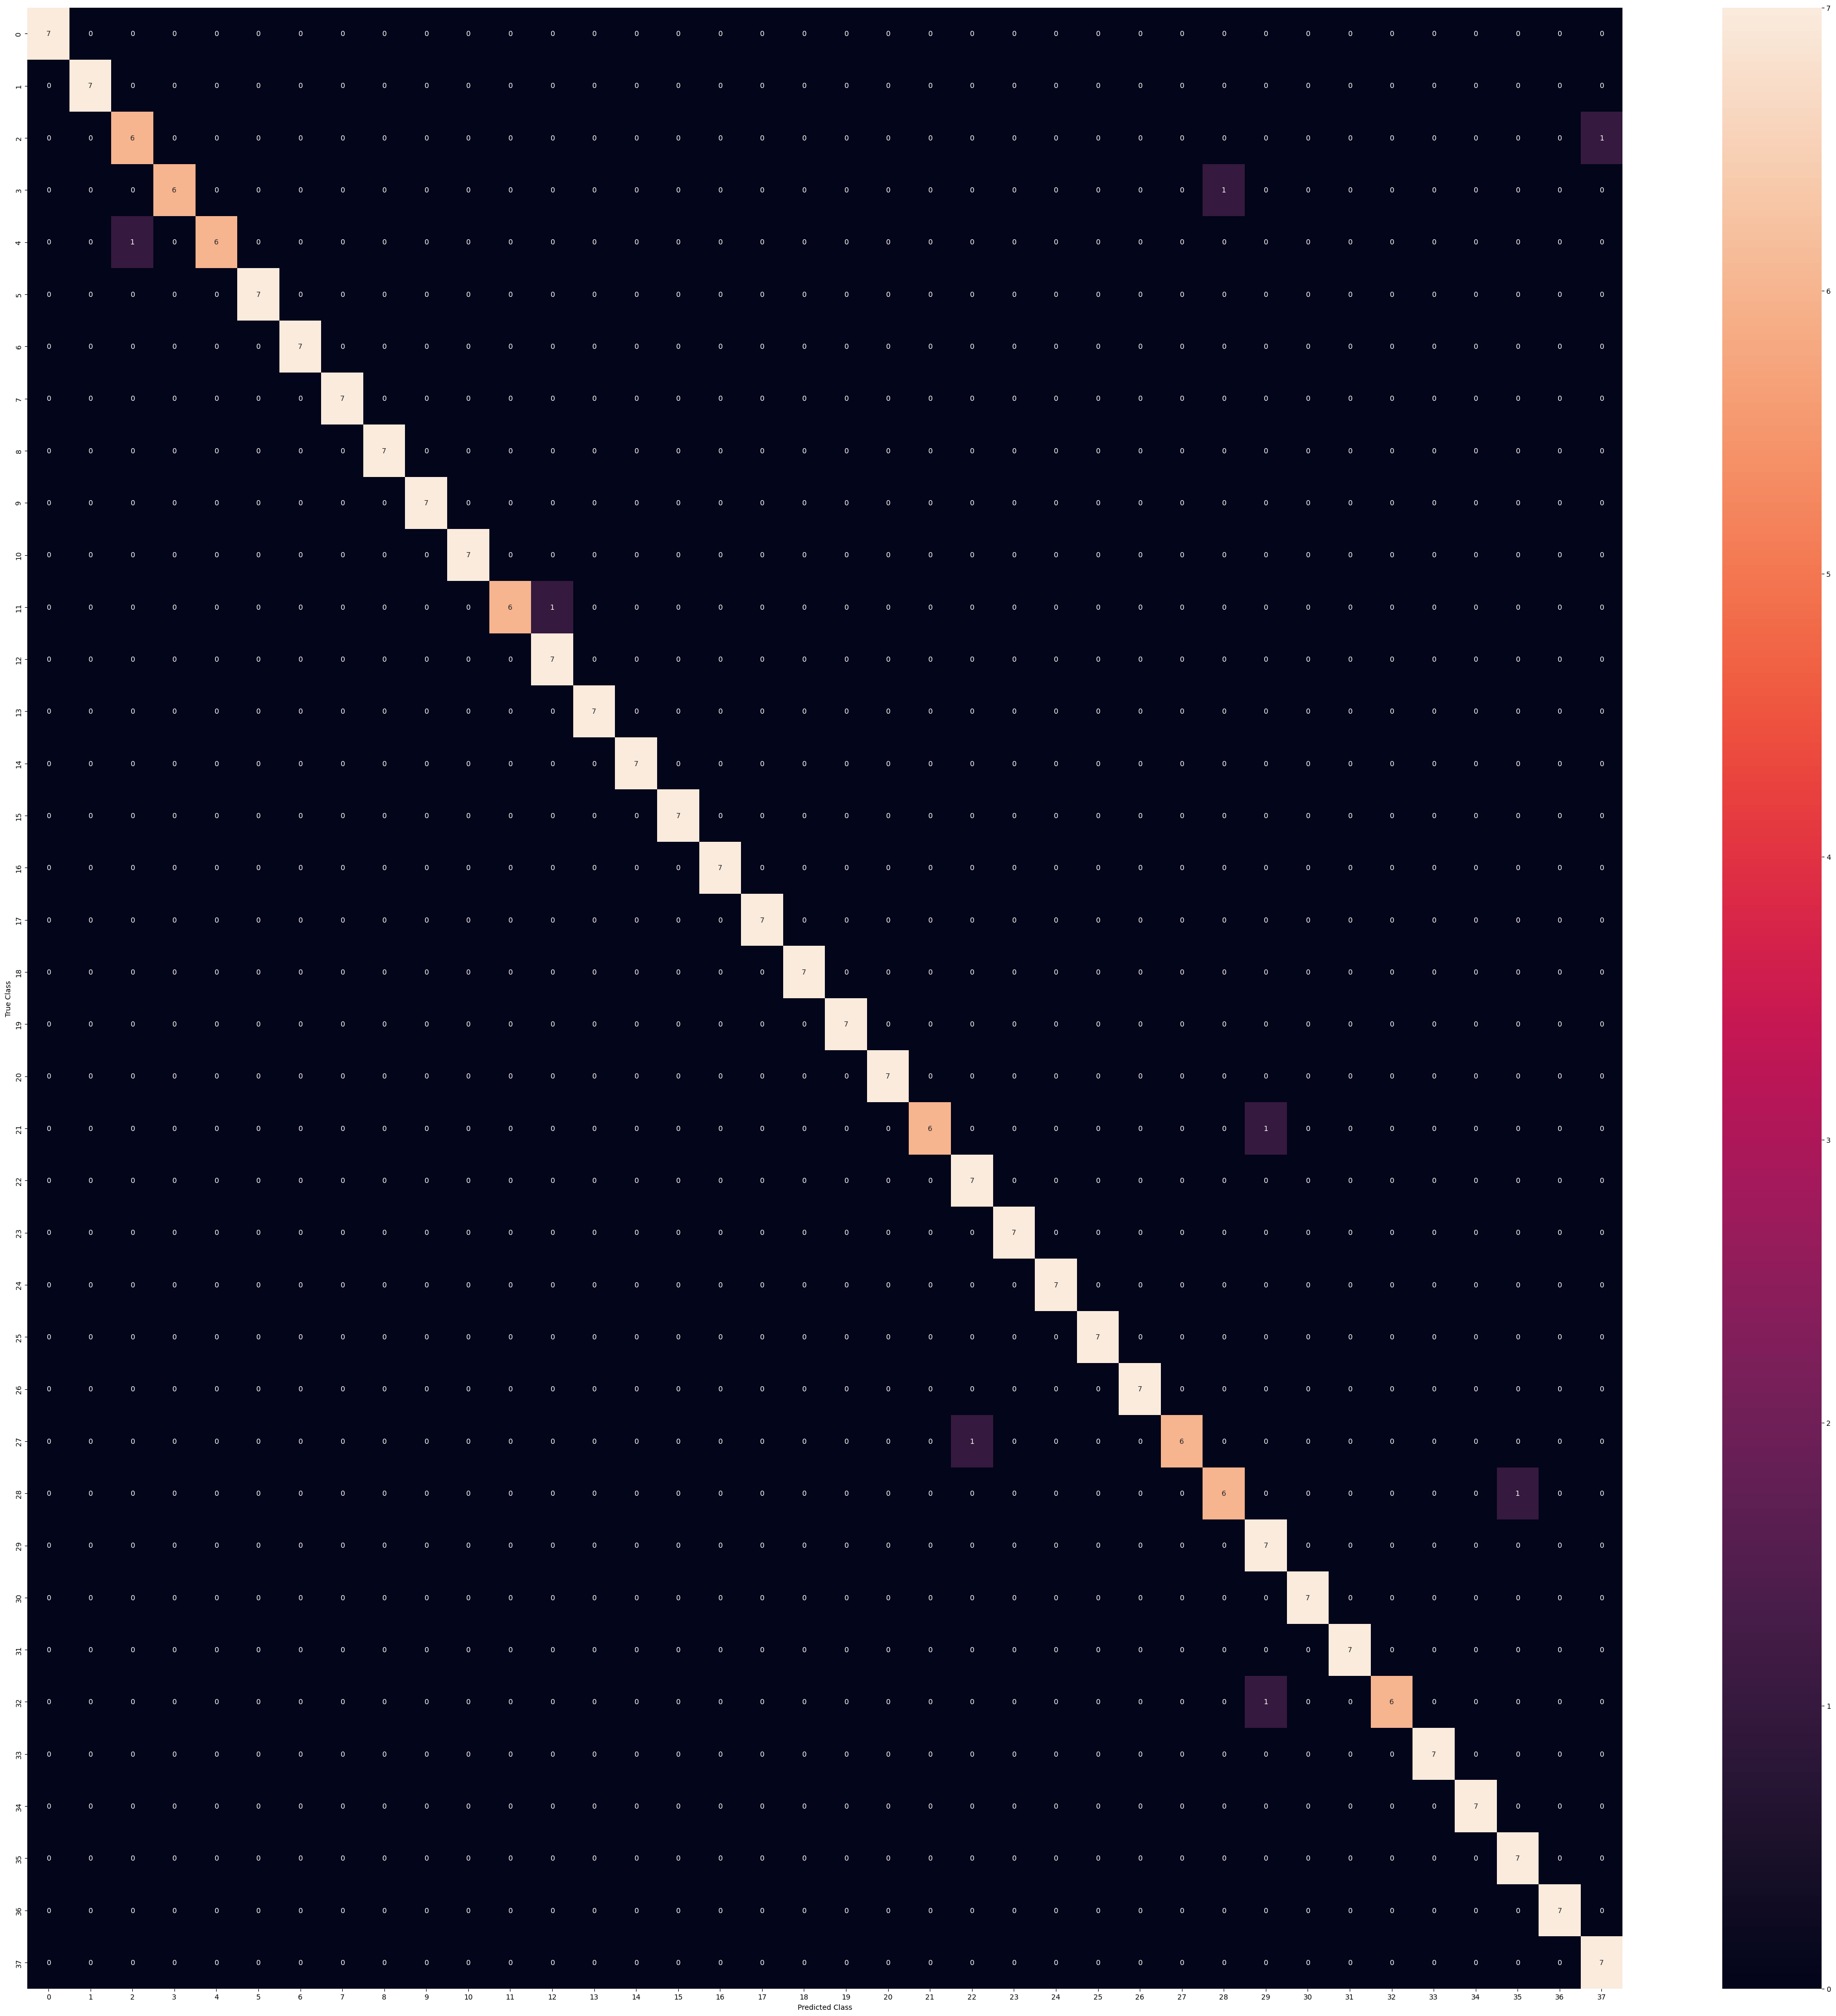

In [17]:
CM = confusion_matrix(true_vals, predicted_vals)
plt.figure(figsize=(50,50))
sns.heatmap(CM, annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()